In [3]:
import pandas as pd
from sklearn import ensemble, metrics, neighbors, manifold
import gc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd

X_test = pd.read_csv('X_train.csv', header=0, index_col=0)
X_train = pd.read_csv("X_test.csv", header=0, index_col=0)
y_train = pd.Series.from_csv("y_test.csv", header=None, index_col=0)
y_test = pd.Series.from_csv('y_train.csv', header=None, index_col=0)

In [5]:
print(X_test.shape)
print(y_test.shape)

(827736, 37)
(827736,)


In [6]:
y_train.value_counts()

0    187106
2     56685
1      3232
4       214
3        10
dtype: int64

In [7]:
y_test.value_counts()

0    625708
2    190582
1     10619
4       785
3        42
dtype: int64

In [8]:

num_dots = 15000

arr = [X_test, y_test]
df = pd.concat(arr, axis = 1)


num4_dots = y_test.value_counts()[4]
num3_dots = y_test.value_counts()[3]
num2_dots = (num_dots - num4_dots - num3_dots) // 3
num1_dots = (num_dots - num4_dots - num3_dots) // 3
num0_dots = (num_dots - num4_dots - num3_dots) // 3


columns = list(df.columns)
columns[-1] = 'class'
df.columns = columns



df0 = df[df['class'] == 0][:num0_dots]
df1 = df[df['class'] == 1][:num1_dots]
df2 = df[df['class'] == 2][:num2_dots]
df3 = df[df['class'] == 3][:num3_dots]
df4 = df[df['class'] == 4][:num4_dots]

arr = [df0, df1, df2, df3, df4]

vis_df = pd.concat(arr, axis=0)

del df0
del df1
del df2
del df3
del df4

gc.collect()

from sklearn.utils import shuffle
vis_df = shuffle(vis_df)

print (vis_df.shape)

vis_labels = pd.DataFrame(data = vis_df['class'] )
vis_labels.head(5)
vis_df.drop('class', axis=1, inplace=True)

(14999, 38)


In [40]:
%%time
#%%notify

tsne = manifold.TSNE(n_components=2, init='pca')
data_2d_tsne = tsne.fit_transform(vis_df)
labels = np.reshape(vis_labels.values, (vis_labels.shape[0]))

<IPython.core.display.Javascript object>

CPU times: user 5min 24s, sys: 11.9 s, total: 5min 36s
Wall time: 5min 36s


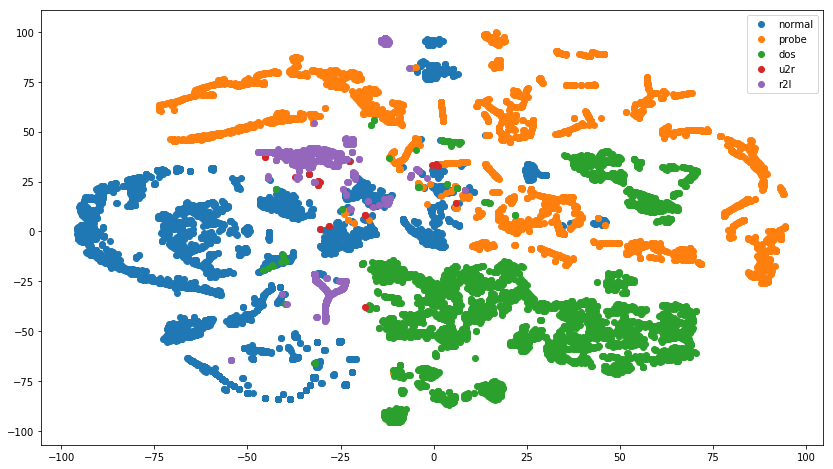

In [43]:
pylab.figure(figsize = (14, 8))
name = ['normal', 'probe', 'dos', 'u2r', 'r2l']
for label in [0, 1, 2, 3, 4]:
    a = [labels == label]
    pylab.scatter(data_2d_tsne[np.where(a[0])[0], 0], data_2d_tsne[np.where(a[0])[0], 1],label = name[label])
pylab.legend()
pylab.show()

In [10]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(vis_df)


CPU times: user 104 ms, sys: 648 ms, total: 752 ms
Wall time: 741 ms


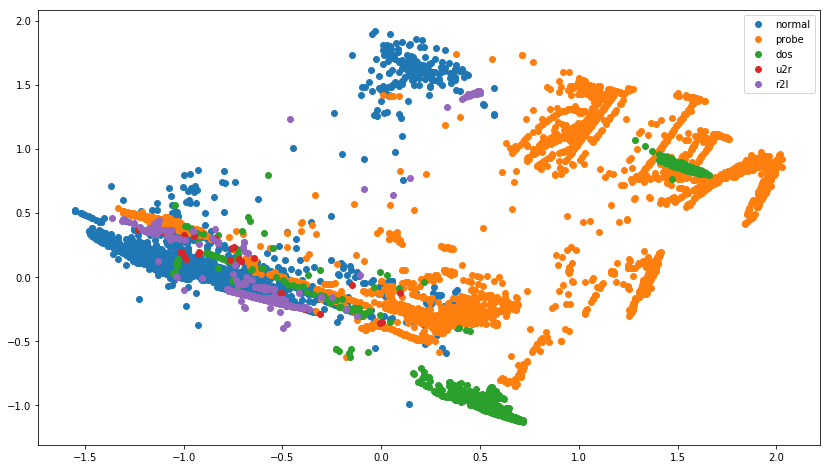

In [13]:
labels = np.reshape(vis_labels.values, (vis_labels.shape[0]))
pylab.figure(figsize = (14, 8))
name = ['normal', 'probe', 'dos', 'u2r', 'r2l']
for label in [0, 1, 2, 3, 4]:
    a = [labels == label]
    pylab.scatter(data_2d_pca[np.where(a[0])[0], 0], data_2d_pca[np.where(a[0])[0], 1],label = name[label])
pylab.legend()
pylab.show()